In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op
from sklearn.metrics import mean_squared_error
import networkx as nx
import itertools

np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

In [2]:
class ising:
    
    def __init__(self,J):
        self.J = J
        self.n = self.J.shape[0]
        self.X = np.random.choice([-1,1],self.n)
        self.S = np.zeros((self.n,self.n))
        self.counts = 0
        self.correl_counts = 0
    
    def update(self):
        self.counts += 1
        i = np.random.randint(0,self.n)
        E = self.X@self.J@self.X
        self.X[i] *= -1
        E_new = self.X@self.J@self.X
        dE = E_new - E
        p = 0.5*(1.0 + np.tanh(E_new-E))
        if np.random.uniform(0,1)>p:
            self.X[i] *= -1
            
        if self.counts%self.n ==0:
            self.correl_counts += 1
            self.S += np.outer(self.X,self.X)   
            
    def getCorrels(self):
        return self.S/self.correl_counts
    

[[0.     0.3454 0.     0.1656 0.    ]
 [0.3454 0.     0.     0.     0.    ]
 [0.     0.     0.     0.0959 0.    ]
 [0.1656 0.     0.0959 0.     0.1855]
 [0.     0.     0.     0.1855 0.    ]]


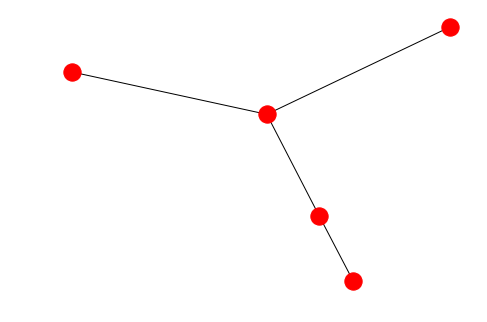

In [16]:
n=5
cp = 2/n
p=[1-cp,cp]
J0 = 1/n
J = np.zeros((n,n))
for i in range (n):   
    for j in range(i,n):
        J[i][j] = J[j][i] = np.random.choice([0,np.random.uniform(0,0.5)],p=[0.6,0.4])
        J[i][i] = 0
np.around(J,decimals = 3)
print(J)
graph = nx.Graph(J)
nx.draw(graph,width = 4, edge_color ='#0699e5',node_color  = '#FEB335',
                           node_size=500)



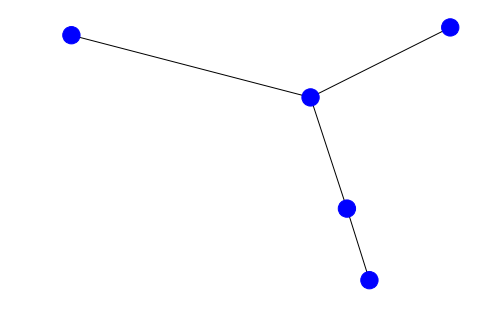

[[1.     0.8815 0.2291 0.5796 0.3601]
 [0.8815 1.     0.2004 0.5093 0.3162]
 [0.2291 0.2004 1.     0.3811 0.2412]
 [0.5796 0.5093 0.3811 1.     0.6297]
 [0.3601 0.3162 0.2412 0.6297 1.    ]]


In [17]:
sys = ising(J)

loops = 100000
for k in range(loops):
    sys.update()

cols = np.where(sys.X>0,'r','b')
nx.draw(graph,node_color=cols)
plt.show()

S = sys.getCorrels()
print(S)




In [18]:
def make_ML(S):
    n = S.shape[0]
    sigmas = list(itertools.product([-1,1],repeat = n))
    def ML(J_list):
        J = J_list.reshape((n,n))
        Z = 0.0
        for s in sigmas:
            Z += np.exp(s@J@s)
        return -(S*J).ravel().sum() + np.log(Z)
    return ML
          

In [19]:
print(J.ravel())
ML = make_ML(S)
x = ML(J.ravel())

[0.     0.3454 0.     0.1656 0.     0.3454 0.     0.     0.     0.
 0.     0.     0.     0.0959 0.     0.1656 0.     0.0959 0.     0.1855
 0.     0.     0.     0.1855 0.    ]


In [20]:
J_guess = np.random.uniform(0,0.0,(n,n))
print(J_guess)
MLE = op.minimize(ML,J_guess.ravel())

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [21]:
J_min =MLE["x"].reshape(n,n) 
print(0.5*J_min)


[[-0.      0.3473  0.0047  0.1679 -0.0028]
 [ 0.3473 -0.     -0.0012 -0.0021 -0.0004]
 [ 0.0047 -0.0012 -0.      0.0979  0.0006]
 [ 0.1679 -0.0021  0.0979 -0.      0.1868]
 [-0.0028 -0.0004  0.0006  0.1868 -0.    ]]


In [22]:
print(J.ravel().reshape(n,n))

[[0.     0.3454 0.     0.1656 0.    ]
 [0.3454 0.     0.     0.     0.    ]
 [0.     0.     0.     0.0959 0.    ]
 [0.1656 0.     0.0959 0.     0.1855]
 [0.     0.     0.     0.1855 0.    ]]


In [23]:
mean_squared_error(J,0.5*J_min)

4.02133718283333e-06

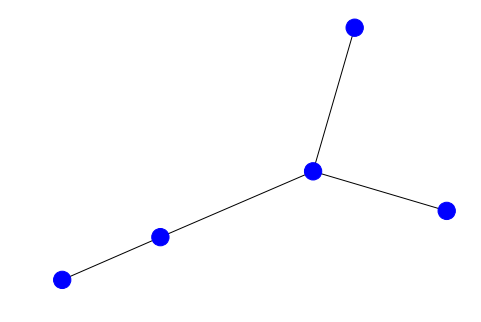

[[1.     0.8839 0.2289 0.5661 0.3341]
 [0.8839 1.     0.2044 0.498  0.2954]
 [0.2289 0.2044 1.     0.3896 0.2388]
 [0.5661 0.498  0.3896 1.     0.6182]
 [0.3341 0.2954 0.2388 0.6182 1.    ]]
[[1.     0.8815 0.2291 0.5796 0.3601]
 [0.8815 1.     0.2004 0.5093 0.3162]
 [0.2291 0.2004 1.     0.3811 0.2412]
 [0.5796 0.5093 0.3811 1.     0.6297]
 [0.3601 0.3162 0.2412 0.6297 1.    ]]


In [24]:
sys2 = ising(0.5*J_min)

loops = 100000
for k in range(loops):
    sys2.update()

cols = np.where(sys.X>0,'r','b')
nx.draw(graph,node_color=cols)
plt.show()

S2 = sys2.getCorrels()
print(S2)
print(S)

In [25]:
mean_squared_error(S,S2)

0.00013205119999999982